<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
اکتشاف
</font>
</h1>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این گام از پروژه به تحلیل بیشتر بر روی سفارش‌ها پرداخته و با پاسخ به چند پرسش و رسم چند نمودار، دید بهتری از اطلاعات مالی شرکت به دست خواهید آورد.
</font>
</p>

   
<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
کتابخانه‌ها
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
       ابتدا کتابخانه‌های مورد نیاز خود را فرا بخوانید.
</font>
</p>

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
    خواندن مجموعه‌داده
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    حال داده‌های پیش‌پردازش‌شده را که در گام قبل پروژه در فایل <code>preprocessed_sales.csv</code> ذخیره کردید به شکل یک دیتافریم بخوانید.
</font>
</p>

In [2]:
df = pd.read_csv('preprocessed_sales.csv')
df.head()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
    قسمت اول
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    تعداد فاکتورهای باقی‌مانده چند عدد است؟ توجه داشته باشید که منظور تعداد فاکتورهای یکتاست. پاسخ خود را در متغیر <code>number_of_orders</code> ذخیره کنید.
        
</font>
</p>

In [3]:
number_of_orders = df["InvoiceNumber"].nunique()
number_of_orders

19213


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
    قسمت دوم
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
این داده‌ها در چه بازه‌ی زمانی‌ای جمع‌آوری شده‌اند؟ پاسخ خود را به‌صورت یک tuple در متغیر <code>window_period</code> ذخیره کنید که به‌ترتیب شامل کوچک‌ترین زمان و بزرگترین زمان باشد.
    <br>
    به عنوان مثال، اگر فرضاً کوچک‌ترین زمان، <code dir=ltr>2008-04-05 18:20:00</code> و بزرگ‌ترین زمان، <code dir=ltr>2010-11-19 20:40:00</code> باشد، آنگاه این متغیر به‌صورت زیر مقدار‌دهی می‌شود:
</font>
</p>

```python
window_period = ('2008-04-05 18:20:00', '2010-11-19 20:40:00')
```

In [4]:
# Converting the InvoiceDate column to datetime to ensure proper handling of date and time
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Finding the minimum and maximum dates in the InvoiceDate column
min_date = df["InvoiceDate"].min()
max_date = df["InvoiceDate"].max()

# Storing the result in the specified format
window_period = (min_date.strftime('%Y-%m-%d %H:%M:%S'), max_date.strftime('%Y-%m-%d %H:%M:%S'))
window_period

('2009-12-01 07:45:00', '2010-12-09 20:01:00')

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
    قسمت سوم
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با استفاده از نمودار میله‌ای، نشان دهید که در هر روز هفته (دوشنبه، سه‌شنبه و...) چند فاکتور یکتا صادر شده است.
<br>
برای انجام این کار، ابتدا باید روزی از هفته که معامله در آن انجام شده است را پیدا کنید، سپس محاسبه کنید که در هر روز هفته، چند فاکتور یکتا صادر شده است.
<br>
نمودار شما باید مشابه با تصویر زیر باشد:
</font>
</p>

<p style="text-align:center; background: white"><img src="fig1.png"></p>

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>ویژگی‌های نمودار</b>

</font>
</h3>

<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>

| <b style="color:#0099cc">ویژگی</b> | <b style="color:#0099cc">مقدار</b> |
| :---: | :---: |
| اندازه‌ی شکل | ۱۵ در ۶ اینچ |
| رنگ میله‌ها | <code>lime</code> |
| رنگ عنوان محور افقی و عمودی | <code>lightseagreen</code> | 
| رنگ عنوان صفحه‌محور | <code>green</code> |
| اندازه‌ی فونت عنوان صفحه‌محور، عنوان محورهای افقی و عمودی و اسم روزهای هفته | ۱۵ |
| زاویه‌ی اسم روزهای هفته | ۰ | 

</font>
</div>
</center>

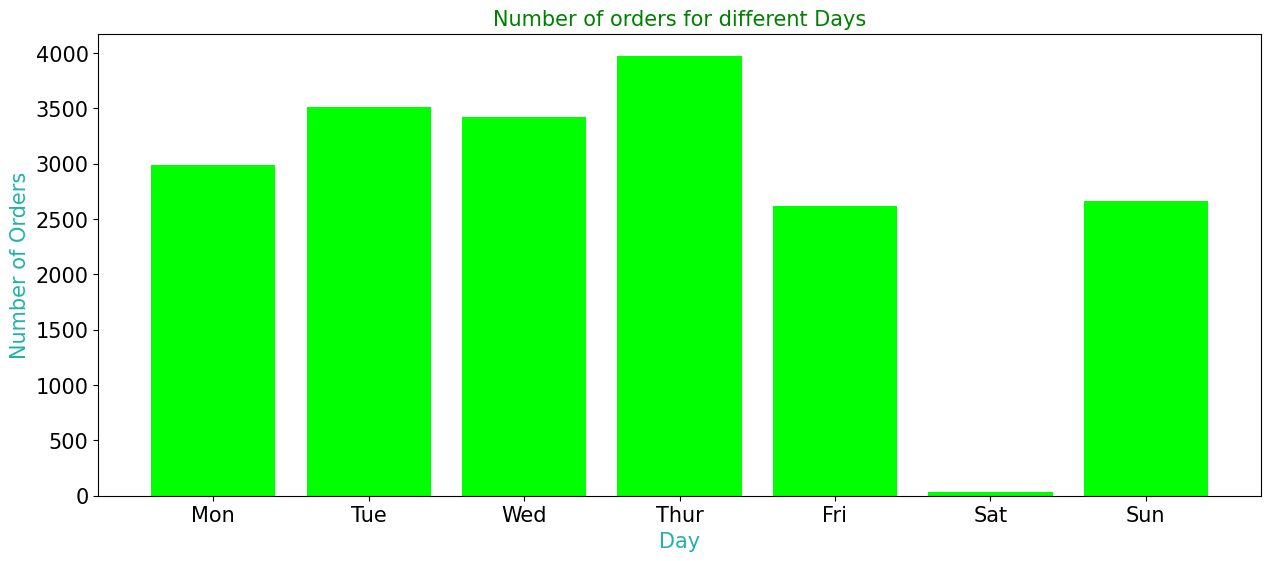

In [5]:
# Correcting the day labels to match the exact names given
day_labels = ["Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"]

# Recalculating the number of unique orders per day
orders_per_day_corrected = df.groupby(df["InvoiceDate"].dt.dayofweek)["InvoiceNumber"].nunique()

# Reordering by day of the week and renaming to specified labels
orders_per_day_corrected.index = day_labels

# Plotting with specified formatting
fig1, ax1 = plt.subplots(figsize=(15, 6))
ax1.bar(orders_per_day_corrected.index, orders_per_day_corrected.values, color="lime")
ax1.set_title("Number of orders for different Days", color="green", fontsize=15)
ax1.set_xlabel("Day", color="lightseagreen", fontsize=15)
ax1.set_ylabel("Number of Orders", color="lightseagreen", fontsize=15)
ax1.tick_params(axis='x', labelrotation=0, labelsize=15)
ax1.tick_params(axis='y', labelsize=15)

plt.show()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
    قسمت چهارم
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اکنون یک نمودار میله‌ای از مجموع فروش هر ماه از هر سال رسم کنید. توجه داشته باشید مجموع فروش هر ردیف از دیتافریم به کمک ضرب قیمت واحد آن (ستون <code>UnitPrice</code>) در تعداد سفارش آن محصول (ستون <code>Quantity</code>) به دست می‌آید.
<br>
نمودار شما باید مشابه با تصویر زیر باشد:
</font>
</p>

<p style="text-align:center; background: white"><img src="fig2.png"></p>


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
ویژگی‌های نمودار
</font>
</h2>


<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>

| <b style="color:#0099cc">ویژگی</b> | <b style="color:#0099cc">مقدار</b> |
| :---: | :---: |
| اندازه‌ی شکل | ۱۵ در ۶ اینچ |
| رنگ میله‌ها | <code>darkkhaki</code> |
| رنگ عنوان محور افقی و عمودی | <code>orange</code> | 
| رنگ عنوان صفحه‌محور | <code>cadetblue</code> |
| اندازه‌ی فونت عنوان صفحه‌محور، عنوان محورهای افقی و عمودی | ۱۵ |
| اندازه‌ی فونت اسم ماه‌ها | ۱۳ | 
| زاویه‌ی اسم ماه‌ها | ۴۵ | 

</font>
</div>
</center>

C:\Users\Ghost\AppData\Local\Temp\ipykernel_2960\1076994165.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(months_labels, rotation=45, fontsize=13)


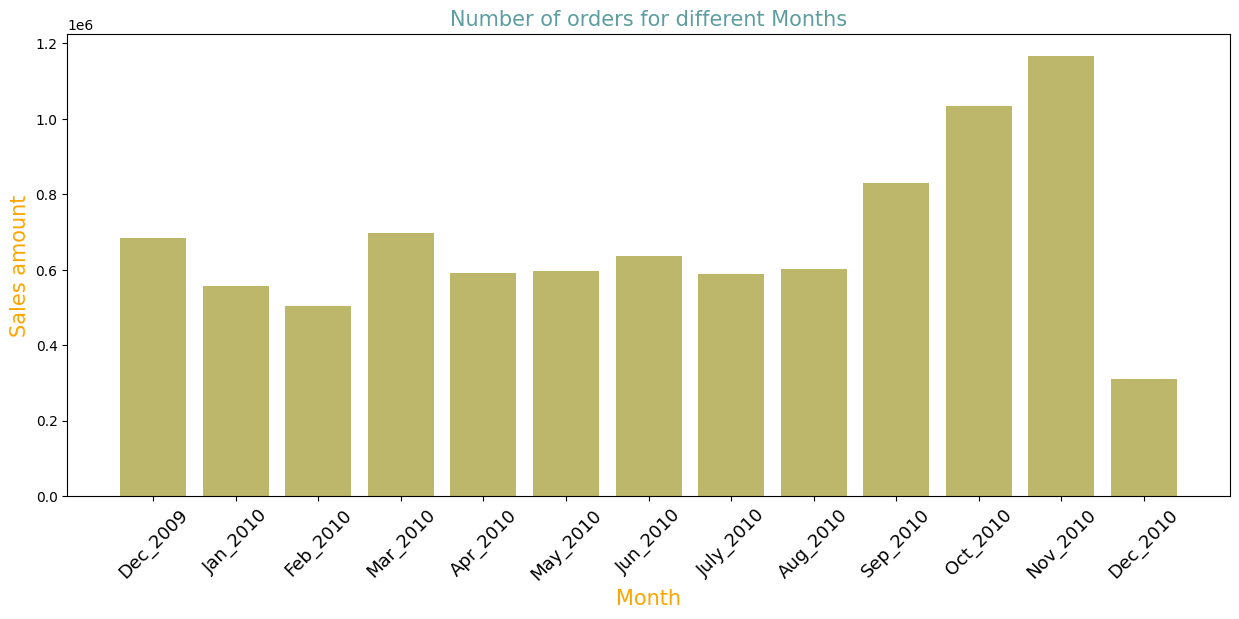

In [6]:
# Calculating the sales amount by multiplying UnitPrice by Quantity for each row
df["SalesAmount"] = df["UnitPrice"] * df["Quantity"]

# Grouping by month and year to calculate the monthly sales totals
monthly_sales = df.groupby(df["InvoiceDate"].dt.to_period("M"))["SalesAmount"].sum()

# Converting the index to a timestamp format and renaming it for plotting
monthly_sales.index = monthly_sales.index.to_timestamp()

# Manually setting the months as required in the specified format
months_labels = [
    'Dec_2009', 'Jan_2010', 'Feb_2010', 'Mar_2010', 'Apr_2010', 'May_2010',
    'Jun_2010', 'July_2010', 'Aug_2010', 'Sep_2010', 'Oct_2010', 'Nov_2010', 'Dec_2010'
]

# Plotting the bar chart with the specified formatting
fig2, ax2 = plt.subplots(figsize=(15, 6))
ax2.bar(months_labels[:len(monthly_sales)], monthly_sales.values, color="darkkhaki")
ax2.set_title("Number of orders for different Months", color="cadetblue", fontsize=15)
ax2.set_xlabel("Month", color="orange", fontsize=15)
ax2.set_ylabel("Sales amount", color="orange", fontsize=15)
ax2.set_xticklabels(months_labels, rotation=45, fontsize=13)

plt.show()